# Import Libraries

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings('ignore')

# Read Dataset

In [77]:
try:
    train = pd.read_csv('train.csv')
except:
    train = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')

# Dataset Overview

In [78]:
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [79]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [80]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## Checking for missing values or duplicated

In [82]:
train.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [83]:
train.duplicated().sum()

0

# Statistical Description of Categorical Variables¶

In [84]:
train_categorical  = train[['blue', 'dual_sim',  'four_g', 'n_cores',  'three_g','touch_screen', 'wifi', 'price_range']].astype(str)

uniqe_counts = train_categorical.nunique()
uniqe_values = train_categorical.apply(lambda x: x.unique())

pd.DataFrame({"Uniqe values count": uniqe_counts , "Values" : uniqe_values})

,Uniqe values count,Values
blue,2,"[0, 1]"
dual_sim,2,"[0, 1]"
four_g,2,"[0, 1]"
n_cores,8,"[2, 3, 5, 6, 1, 8, 4, 7]"
three_g,2,"[0, 1]"
touch_screen,2,"[0, 1]"
wifi,2,"[1, 0]"
price_range,4,"[1, 2, 3, 0]"


## Correlation Matrix

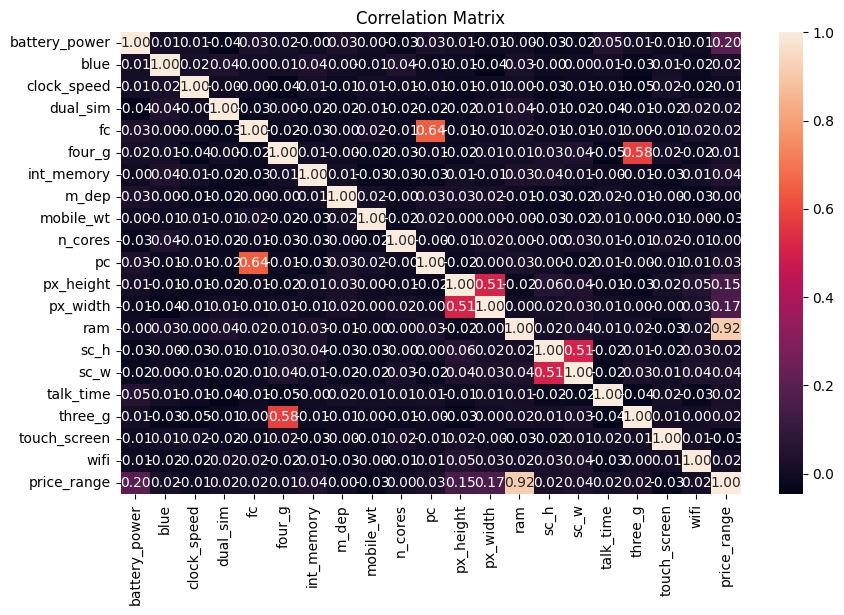

In [85]:
plt.figure(figsize=(10,6))
plt.title("Correlation Matrix")
sns.heatmap(train.corr() , fmt=".2f" , annot=True )

plt.show()

## Train test split

In [86]:
y2 = train['price_range']
X2 = train.drop('price_range' , axis =1)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

## Model selection with Probabilistic PCA and Factor Analysis (FA)

In [88]:
y2 = df2['price_range']
X2 = df2.drop('price_range' , axis =1)

In [89]:
def compute_score(x):
    pca_scores, factor_scores = [], []
    for n in range(1, len(x.columns) + 1):  
        pca = PCA(n_components=n)
        factor = FactorAnalysis(n_components=n)
        pca_scores.append(np.mean(cross_val_score(pca, x)))
        factor_scores.append(np.mean(cross_val_score(factor, x)))

    return pca_scores, factor_scores
scores_pca, scores_factor = compute_score(X_train)

n_components_pca = np.argmax(scores_pca)  + 1
n_components_fac = np.argmax(scores_factor)  + 1 

print("best n_components by PCA CV = %d" % n_components_pca)
print("best n_components by FactorAnalysis CV = %d" % n_components_fac)

best n_components by PCA CV = 18
best n_components by FactorAnalysis CV = 13


In [90]:
pca = PCA(n_components=n_components_pca)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


fac = FactorAnalysis(n_components=n_components_fac)
X_train_fac = fac.fit_transform(X_train)
X_test_fac = fac.transform(X_test)


## StandardScaler

In [91]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Random forest and Grid Search

In [92]:
rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [200, 400, 600],
    'max_depth' : [10, 20, 30] , 
    'max_features' : ['auto', 'sqrt'],
    'min_samples_split': [2, 5, 10] ,
    'bootstrap' : [True, False],
    
}

### Model to predict

### Randm Forest with data after PCA , FA , StandardScaler and without them

In [93]:
def train_and_evaluate(X_train, X_test, y_train, y_test, param_grid):
    grid = GridSearchCV(rf, param_grid, n_jobs=2, scoring='accuracy')
    grid.fit(X_train, y_train)
    y_train_pred = grid.best_estimator_.predict(X_train)
    y_test_pred = grid.best_estimator_.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    return train_accuracy, test_accuracy, grid.best_params_

In [94]:
results_train = {}
results_test = {}

In [95]:
results_train["Normal"],results_test['Normal'], best_params_nom = train_and_evaluate(X_train, X_test, y_train, y_test, param_grid)
results_train["PCA"], results_test["PCA"], best_params_pca = train_and_evaluate(X_train_pca, X_test_pca, y_train, y_test, param_grid)
results_train["Factor Analysis"], results_test["Factor Analysis"], best_params_fa = train_and_evaluate(X_train_fac, X_test_fac, y_train, y_test, param_grid)
results_train["Standard Scaler"], results_test["Standard Scaler"], best_params_ss = train_and_evaluate(X_train_scaled, X_test_scaled, y_train, y_test, param_grid)

## Comparison of pca, fa , standard scaler and without them

Normal - Train Accuracy: 1.0000, Test Accuracy: 0.8800
PCA - Train Accuracy: 1.0000, Test Accuracy: 0.8950
Factor Analysis - Train Accuracy: 1.0000, Test Accuracy: 0.9200
Standard Scaler - Train Accuracy: 1.0000, Test Accuracy: 0.8850


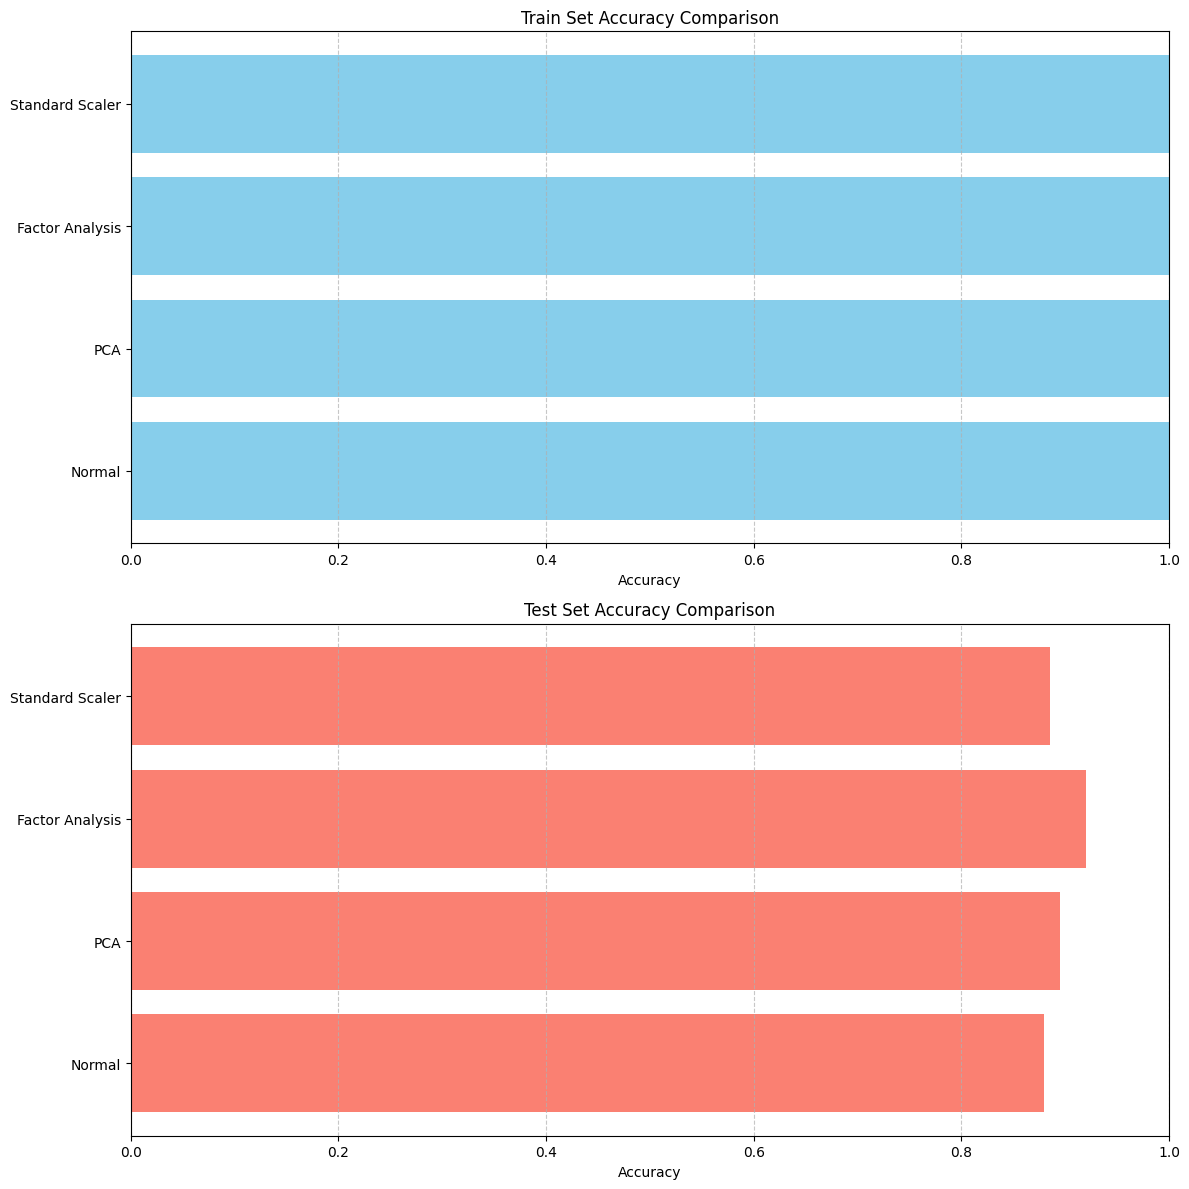

In [96]:
for method in results_train:
    print(f"{method} - Train Accuracy: {results_train[method]:.4f}, Test Accuracy: {results_test[method]:.4f}")


methods = list(results_train.keys())
train_accuracies = list(results_train.values())
test_accuracies = list(results_test.values())

fig, ax = plt.subplots(2, 1, figsize=(12, 12))


ax[0].barh(methods, train_accuracies, color='skyblue')
ax[0].set_xlabel('Accuracy')
ax[0].set_title('Train Set Accuracy Comparison')
ax[0].set_xlim(0, 1)
ax[0].grid(axis='x', linestyle='--', alpha=0.7)


ax[1].barh(methods, test_accuracies, color='salmon')
ax[1].set_xlabel('Accuracy')
ax[1].set_title('Test Set Accuracy Comparison')
ax[1].set_xlim(0, 1)
ax[1].grid(axis='x', linestyle='--', alpha=0.7)

fig.tight_layout()
plt.show()